In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, f_oneway, kruskal # numeric Vs catogerical
from scipy.stats import chi2_contingency # categorical Vs categorical

from scipy.stats import kstest # cdf


from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import norm


from statsmodels.graphics.gofplots import qqplot_2samples, qqplot

from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
df = pd.read_csv("Sachin_ODI.csv")

In [6]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [7]:
df.shape

(360, 14)

In [8]:
df["Inns"].value_counts()

2    190
1    170
Name: Inns, dtype: int64

In [9]:
df.groupby(["Inns"])["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [10]:
df_first_innings = df[df["Inns"]==1]
df_second_innings = df[df["Inns"]==2]

In [11]:
# H0: scoring pattern across these two are the same
ttest_ind(df_first_innings["runs"], df_second_innings["runs"])
# Fail to reject: they are the same

Ttest_indResult(statistic=1.4612016295532178, pvalue=0.14483724194759962)

In [13]:
# H0: scoring pattern across these two are the same
f_oneway(df_first_innings["runs"], df_second_innings["runs"])
# Fail to reject: they are the same

F_onewayResult(statistic=2.1351102022089794, pvalue=0.1448372419476105)

In [14]:
shapiro(df_first_innings["runs"])

ShapiroResult(statistic=0.8673969507217407, pvalue=4.3107607761161404e-11)

<AxesSubplot:xlabel='runs', ylabel='Count'>

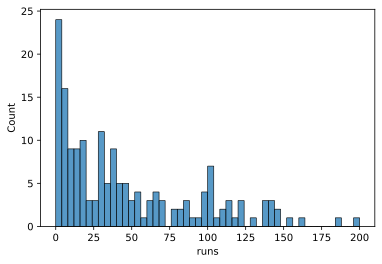

In [15]:
sns.histplot(df_first_innings["runs"], bins = 50)

<AxesSubplot:xlabel='runs', ylabel='Count'>

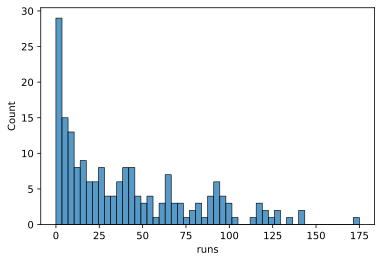

In [16]:
sns.histplot(df_second_innings["runs"], bins = 50)

In [17]:
# H0: scoring pattern across these two are the same
kruskal(df_first_innings["runs"], df_second_innings["runs"])
kruskal(df_first_innings["runs"], df_second_innings["runs"])
# Fail to reject: they are the same

KruskalResult(statistic=0.9696787893311016, pvalue=0.32476030097031194)

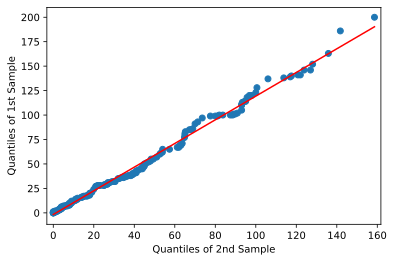

In [18]:
# Quantile-Quantile plot
qqplot_2samples(df_first_innings["runs"], df_second_innings["runs"], line="r")
plt.show() 

In [19]:
e1 = ECDF(df_first_innings["runs"])
e2 = ECDF(df_second_innings["runs"])

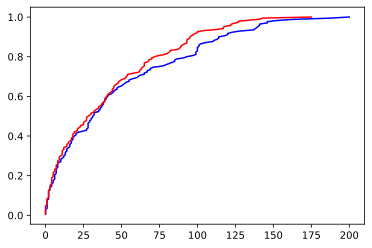

In [20]:
plt.plot(e1.x, e1.y, c = 'b')

plt.plot(e2.x, e2.y, c = 'r')

In [21]:
# H0: two samples come from same distribution
kstest(df_first_innings["runs"], df_second_innings["runs"])
# Fail to reject

KstestResult(statistic=0.10990712074303406, pvalue=0.2086874783173226)

In [22]:
df.groupby(["Inns"])["runs"].std()

Inns
1    45.929941
2    38.385904
Name: runs, dtype: float64

In [23]:
# H0 : same std dev

levene(df_first_innings["runs"], df_second_innings["runs"])

LeveneResult(statistic=2.538030840814755, pvalue=0.11201580263415106)

## Out of form in any year

In [26]:
df["year"] = pd.DatetimeIndex(df['Date']).year

In [27]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century,year
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False,1995
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False,1995
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False,1995
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False,1995
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False,1995


In [28]:
df["runs"].mean()

43.24166666666667

In [29]:
df.groupby(["year"]).agg({"runs" : [np.mean, "count"]})

runs      
            mean count
year                  
1995   37.000000    12
1996   52.666667    30
1997   28.083333    36
1998   57.393939    33
1999   39.095238    21
2000   39.151515    33
2001   56.500000    16
2002   39.000000    19
2003   54.333333    21
2004   38.666667    21
2005   25.750000    16
2006   41.733333    15
2007   44.531250    32
2008   38.333333    12
2009   48.600000    20
2010  102.000000     2
2011   46.636364    11
2012   31.500000    10

In [30]:
for year in df["year"].unique():
    df_year = df[df["year"]==year]
    df_other_years = df[df["year"]!=year]
    t_stat, p_value = ttest_ind(df_year["runs"], df_other_years["runs"],alternative="less")
    if p_value<0.05:
        print("Sachin was out of form in ", year)

Sachin was out of form in  1997
Sachin was out of form in  2005


In [34]:
# df.runs.max()